In [13]:
## This file will open any downloaded netCDF files and process them

import netCDF4
import numpy as np
import matplotlib.pyplot as plt

file = netCDF4.Dataset('./CMIP6/sfcWind_Amon_ACCESS-ESM1-5_ssp126_r34i1p1f1_gn_201501-210012.nc')

print(file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: ScenarioMIP
    branch_method: standard
    branch_time_in_child: 60265.0
    branch_time_in_parent: 60265.0
    creation_date: 2021-07-12T02:45:12Z
    data_specs_version: 01.00.30
    experiment: update of RCP2.6 based on SSP1
    experiment_id: ssp126
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.ssp126.none.r34i1p1f1
    grid: native atmosphere N96 grid (145x192 latxlon)
    grid_label: gn
    history: 2021-07-12T02:45:12Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia
    institution_id: CSIRO
    mip_era: CMIP6
    nominal_resolution: 250 km
    notes: Exp: 

In [2]:
print(file.variables.keys())

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'sfcWind'])


In [16]:
sfcWindmvar = file.variables['sfcWind']

#sfcWind = sfcWindmvar[0,0,::-1,:]
print(sfcWindmvar)

<class 'netCDF4._netCDF4.Variable'>
float32 sfcWind(time, lat, lon)
    standard_name: wind_speed
    long_name: Near-Surface Wind Speed
    comment: near-surface (usually, 10 meters) wind speed.
    units: m s-1
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2021-07-12T02:45:11Z altered by CMOR: Treated scalar dimension: 'height'.
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
unlimited dimensions: time
current shape = (1032, 145, 192)
filling on


In [29]:
sfcWind = sfcWindmvar[1, :, ::-1]

print('shape=%s, type=%s, missing_value=%s' % \
 (sfcWind.shape, type(sfcWind), sfcWindmvar.missing_value))

shape=(145, 192), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=1e+20


In [33]:
print(sfcWindmvar)

<class 'netCDF4._netCDF4.Variable'>
float32 sfcWind(time, lat, lon)
    standard_name: wind_speed
    long_name: Near-Surface Wind Speed
    comment: near-surface (usually, 10 meters) wind speed.
    units: m s-1
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2021-07-12T02:45:11Z altered by CMOR: Treated scalar dimension: 'height'.
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
unlimited dimensions: time
current shape = (1032, 145, 192)
filling on


In [11]:
%matplotlib inline

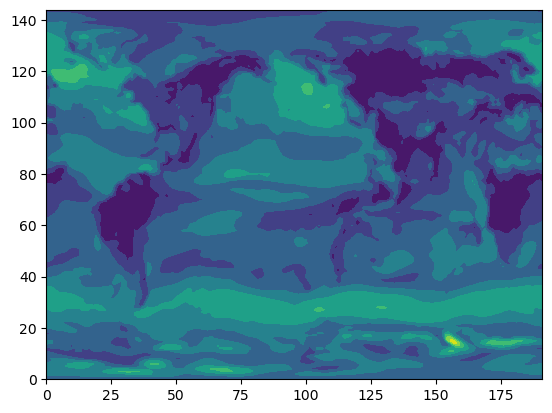

In [30]:
cs = plt.contourf(sfcWind)

shape=(27, 23), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=1e+20


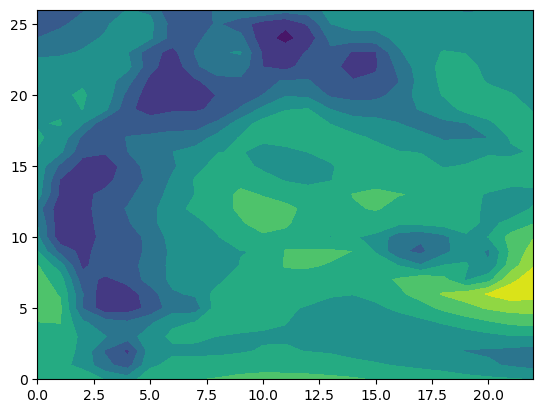

In [63]:
# Here we want to be able to subset the data

#Bounding boxes
#uk = [-7.57216793459, 49.959999905, 1.68153079591, 58.6350001085]
#uk = (73.6753792663, 18.197700914, 135.026311477, 53.4588044297)
uk = (113.338953078, -43.6345972634, 153.569469029, -10.6681857235)
latbounds = [uk[1], uk[3]]
lonbounds = [uk[0], uk[2]]

lats = file.variables["lat"][:]
lons = file.variables["lon"][:]
time = file.variables["time"]

# latitude lower and upper index
latli = np.argmin( np.abs( lats - latbounds[0] ))
latui = np.argmin( np.abs( lats - latbounds[1] )) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonbounds[0] ))
lonui = np.argmin( np.abs( lons - lonbounds[1] ))  

sfcWindSubset = file.variables['sfcWind']

sfcWind = sfcWindSubset[1, latli:(latui+1) , lonli:(lonui+1)]
sfcWind = sfcWind[:,::-1]


print('shape=%s, type=%s, missing_value=%s' % \
 (sfcWind.shape, type(sfcWind), sfcWindmvar.missing_value))

sf = plt.contourf(sfcWind)